# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question. You can merge these datasets with data from different regions if you like!

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about.
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

## 1 Region and Domain

USA and Germany

Science & Technology

## 2 Research Question

How do the research volume (quantified in terms of number of journal articles published) and R&D expenditure compare between the USA and Germany for the period of 2000-2017?

## 3 Links
* USA dataset: https://data.worldbank.org/country/united-states?view=chart
* Germany dataset: https://data.worldbank.org/country/germany?view=chart

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

%matplotlib notebook

### Function definitions

In [6]:
"""
Loads and cleans the data
"""
def load_data(path):
    
    def rename_cols():
        new_names = ['GDP (current US$)',
                    'Journal articles',
                    'R&D expenditure (% of GDP)']
        rename_dic = {x:y for (x,y) in zip(ind_names, new_names)}
        ret_df.rename(columns=rename_dic, inplace = True)
        
        
    # Read in data
    ret_df = pd.read_csv(path, engine='python', skiprows = [0,1,2])
     
    # Variables we are interested in
    ind_names = ['GDP (current US$)',
                'Scientific and technical journal articles',
                'Research and development expenditure (% of GDP)']

    # Choose and clean relevant data
    ret_df = (ret_df[ret_df['Indicator Name'].isin(ind_names)]
              .set_index('Indicator Name')
              .drop(['Country Name', 'Country Code', 'Indicator Code'], axis = 1)
              .T
              .dropna())

    ret_df['GDP (trillions current US$)'] = ret_df['GDP (current US$)']*10**(-12)
    ret_df.drop('GDP (current US$)', axis = 1, inplace = True)

    rename_cols()
    return ret_df


"""
Performs general calculations (column creation and deletion)
"""
def calculations(df):
    df['R&D expenditure (trillions current US$)'] = df['R&D expenditure (% of GDP)']*df['GDP (trillions current US$)']
    df['Journal articles (k)'] = df['Journal articles']*10**(-3)
    df.drop('Journal articles', axis = 1, inplace = True)
    df['Journals/Expenditure (k journals/trillions)'] = df['Journal articles (k)']/df['R&D expenditure (trillions current US$)']
    #df.drop(['R&D expenditure (% of GDP)', 'Journal articles'], axis = 1, inplace = True)
    return df


"""
Creates each individual axis on the figure
"""
def axes_creation(axi, colname, yname):
    years = list(dfus.index) # x-axis tick labels
    alpha = 0.8
    
    # Create plots and y-name
    axi.plot(years, dfde[colname], 'k-', alpha = alpha, label = 'GER')
    axi.plot(years, dfus[colname], '-', color = 'mediumblue', alpha = alpha, label = 'USA')
    axi.set_ylabel(yname)
    
    # Major ticks and tick labels
    axi.xaxis.set_major_locator(MultipleLocator(2))
    axi.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    
    # Minor ticks; no labels
    axi.xaxis.set_minor_locator(MultipleLocator(1))


"""
Makes all the axes in the figure
"""
def make_plots():
    # First figure
    axi0 = fig.add_subplot(gs[0, :])
    axes_creation(axi0, 'Journals/Expenditure (k journals/trillions)', 'Journ/Exp \n (k/tril$)')

    # Second figure
    axi1 = fig.add_subplot(gs[1, 0])
    axes_creation(axi1, 'Journal articles (k)', 'Journal \n articles (k)')

    # Third figure
    axi2 = fig.add_subplot(gs[2, 0])
    axes_creation(axi2, 'R&D expenditure (% of GDP)', 'R&D exp \n (% GDP)')

    # Last figure
    axi3 = fig.add_subplot(gs[3, 0])
    axes_creation(axi3, 'GDP (trillions current US$)', 'GDP \n (tril $)')
    
    return axi0, axi1, axi2, axi3


"""
Sets up some options for the axes in the figure
"""
def configure_plots(axes_list):
    # Set up frames and x-grids
    for ax in axes_list:
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        #ax.grid(axis = 'x', color='grey', linestyle='--', linewidth=1, alpha = 0.2)
    
    # Set up y-grid and legend for top figure
    #axes_list[0].grid(axis = 'y', color='grey', linestyle='-', linewidth=1, alpha = 0.2)
    axes_list[0].legend()
    
    # Only show x tick labels for lower plots and y ones for leftmost plots
    for ax in axes_list:
        ax.label_outer()


### Data loading and preparation

In [7]:
# Get the data
us_path = "API_USA_DS2_en_csv_v2_888413.csv"
de_path = "API_DEU_DS2_en_csv_v2_887601.csv"

# Load data
dfus = load_data(us_path)
dfde = load_data(de_path)

# Create plot data
dfus = calculations(dfus)
dfde = calculations(dfde)

### Ploting part

<IPython.core.display.Javascript object>


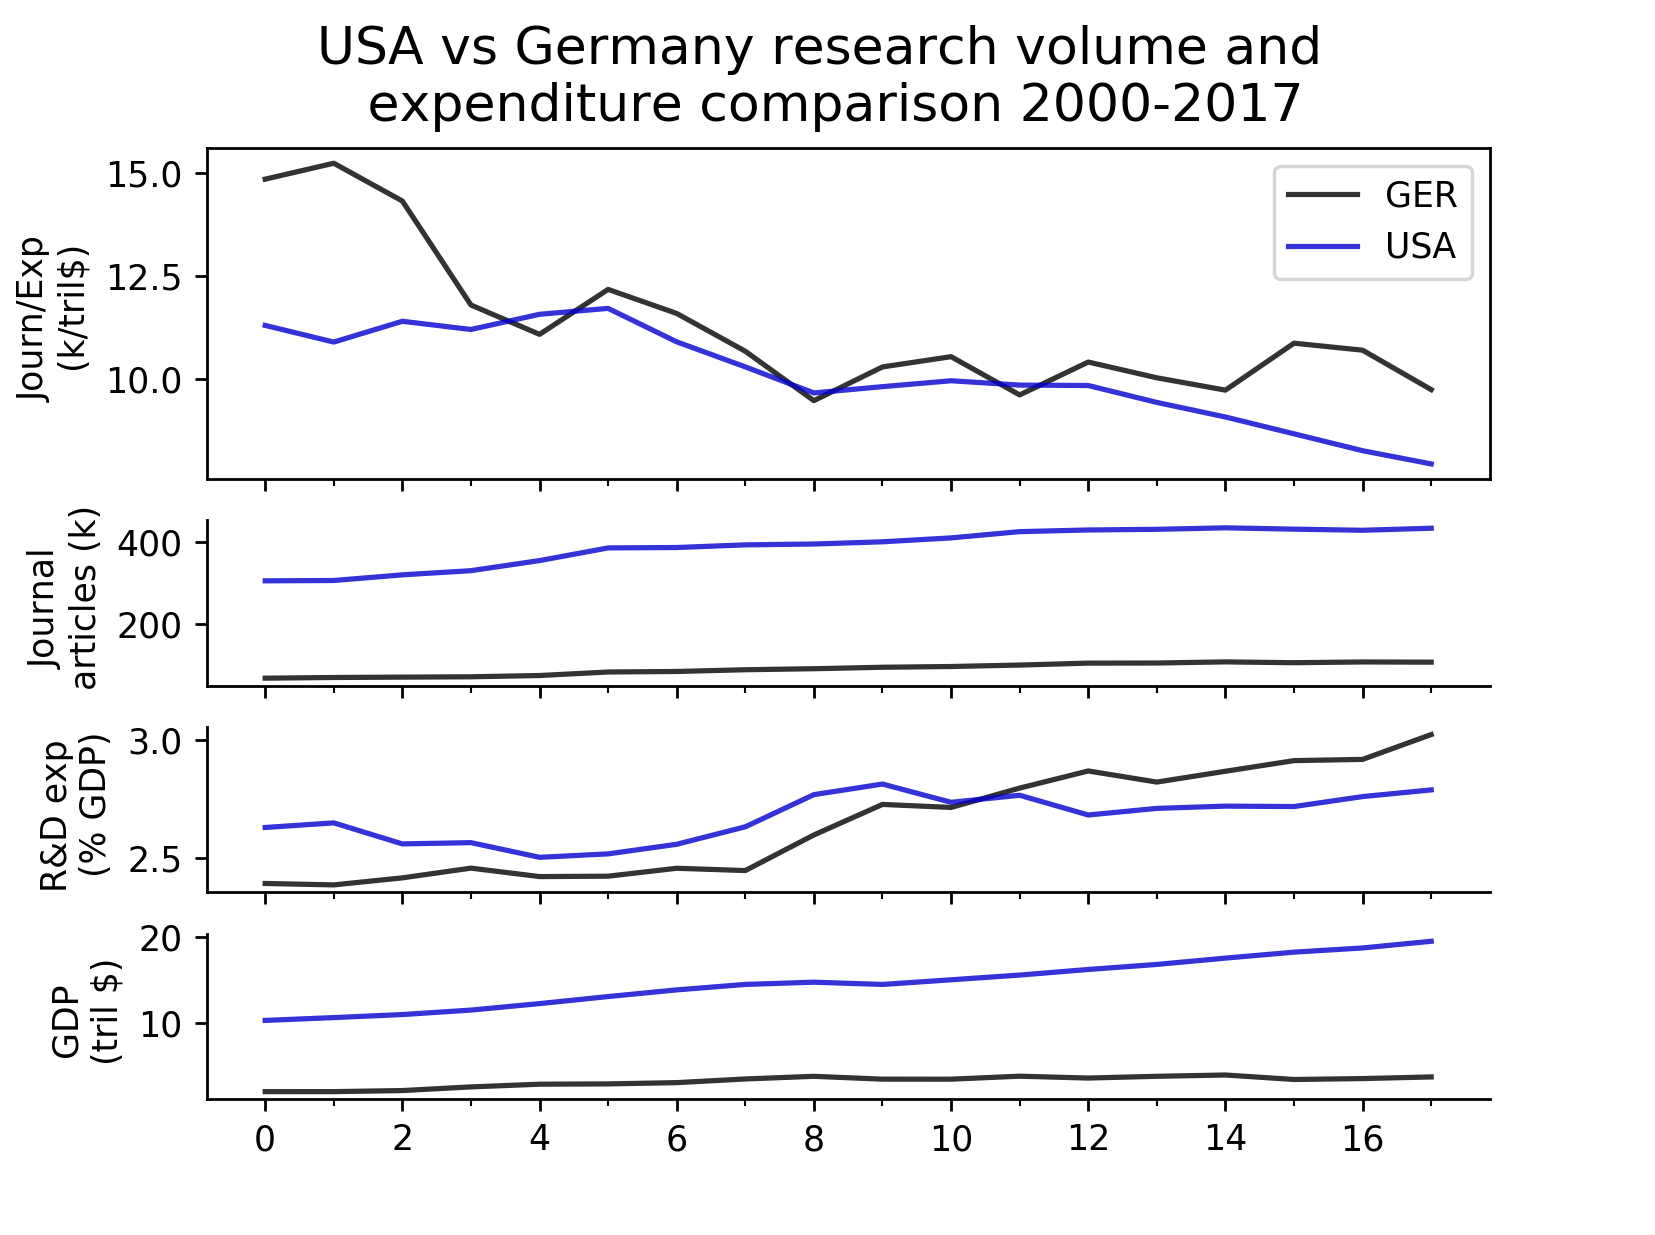

In [9]:
# Create figure and figure title
fig = plt.figure()
fig.suptitle('USA vs Germany research volume and \n expenditure comparison 2000-2017', size=15)

# Grid creation
heights = [4, 2, 2, 2]
gs = gridspec.GridSpec(ncols=1, nrows=4, height_ratios=heights, hspace = 0.2) 

ax0, ax1, ax2, ax3 = make_plots()

axs_list = [ax0, ax1, ax2, ax3]
configure_plots(axs_list)

ax0.spines['right'].set_visible(True)
ax0.spines['top'].set_visible(True)

plt.show()
plt.savefig('Assignment_4.png')

## 5 Discussion

This visualization was concerned with the comparison between the USA and Germany in terms of research volume and Research and Development (R&D) expenditure during the period between 2000 and 2017. The data were taken from the [World Bank](http://data.worldbank.org/). Research volume was quantified through the total number of journal articles (scientific and technical) while the R&D expenditure was calculated as the percentage of the country's GDP. To compare the two countries and try to correct for differences in population and size in general, I calculate the quotient of total journal articles (in thousands) and R&D expenditure (in trillions of current US dollars) which I will be referring to as journal-number-to-expenditure (JNTE) ratio from now on. I believe that, while not perfect, the JNTE ratio is a good start for an unbiased estimator (in terms of the obvious difference in these two countries' sizes), and furthermore I believe it provides some measure of how much research activity is being conducted given the money that each government invests in R&D. For a more complete answer, in addition to the aforementioned ratio, I have also included three more plots that I believe offer further insight, namely the total number of journals (in thousands), the countries' R&D expenditure (as a percent of the country's GDP) and finally the GDP (in current US dollars) for each country.

The top plot in this visualization indicates that Germany generally has a higher JNTE ratio than the US. The US actually overtook Germany for 3 short periods: first during most of 2003-2005, second only briefly during late 2007 and early 2008 and lastly during late 2010 and early 2011. Furthermore, what both countries seem to share is a general decline of the ratio with Germany presenting a steeper drop. 

We can see, from the second plot in the figure, that the US has a larger number of journal publications and also presents a larger increase in the number of articles published during the 2000-2017 period. Furthermore, the US's GDP is also larger and more quickly rising than that of Germany. The US also had a greater percentage of its GDP allocated to R&D, until 2010 where Germany overtook the US and remained on top for the rest of that time period. I find the fact that Germany generally has a higher JNTR ratio than the US slightly surprising, since the US is larger and has a higher GDP than Germany; personally, I was expecting the opposite. Lastly, I want to point out that this figure merely suggests a difference, since I am aware that there are many factors I have not included which might affect the outcome.

## 6 Cairo's principles

- Truthfulness: I have made my best effort for my visualization to be truthful by carefully calculating what I had to calculate and fairly representing the data in my visualization.

- Beauty: I believe my visual to be fairly beautiful without losing functionality. I have just used different colors for the two different countries which I find suiting.

- Functionality: I have made my plot as functional as I think it can be by having no grid lines (since we are only interested in the comparison between the two countries), made the x and y axes shared and only added tick labels where it was necessary. I have also removed the upper and rightmost box lines to make everything more clear to the eye.

- Insightfulness: I believe my figure to be fairly insightful, since not only it immediately answers the posed question, but also explores all the relevant variables so that the viewer can understand the situation better.